# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

1. Follow the pseudocode in the book exactly.
2. Learn about the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem).


These links are to help me navigate your notebook:

1. [Four Color Connecticut](#four_ct)
2. [Three Color Connecticut](#three_ct)
3. [Four Color Europe](#four_eu)
4. [Three Color Europe](#three_eu)


## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using at most four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>Do not use NetworkX nodes as the data structure for your assignment.
    We are only using it to color the maps.
    Use basic Python data structures as specified in the general programming requirements.</p>
</div>


In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

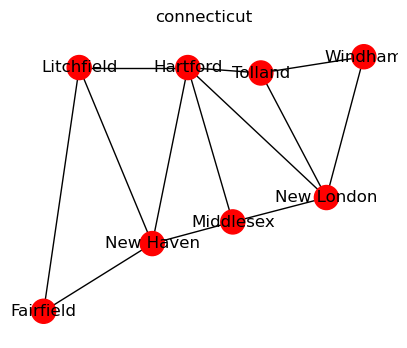

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. Look at the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You *must* implement **Degree Heuristic** (to pick variables) and **Least Constraining Value** (to pick values).
You *may* implement **Minimum Remaining Values** as a tie breaker, if you like.
Otherwise, break ties in ascending order (least to most).
(Which functions in the pseudocode represent the heuristics?).

You should get the backtracking and forward checking implemented first. 
Then add the heuristics. 
You must use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. 
When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

```
Required:
    backtracking: yes
    forward checking: yes
    degree heuristic: yes
    least contraining value: yes
Optional:    
    minimum remaining values: yes
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).

Don't print out a lot of noise.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

Implement the color_map function where the goal is to color all the nodes such that no adjacent nodes are colored the same color. Take in the pramaters planar_map and color_list, where planar_map is a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list. color_list is a list of colors. Use backtracing_search following the pseudocode provided: function BACKTRACKING-SEARCH(csp) returns a solution or failure
return BACKTRACK(csp, { })
function BACKTRACK(csp, assignment) returns a solution or failure
if assignment is complete then return assignment
var ← SELECT-UNASSIGNED-VARIABLE(csp, assignment)
for each value in ORDER-DOMAIN-VALUES(csp, var , assignment) do
if value is consistent with assignment then
add {var = value} to assignment
inferences ← INFERENCE(csp, var , assignment)
if inferences 6= failure then
add inferences to csp
result ← BACKTRACK(csp, assignment)
if result 6= failure then return result
remove inferences from csp
remove {var = value} from assignment
return failure

### is_consistent
`is_consistent` Checks if assigning a color to a node is consistent with the constraints. **Used by**: [backtrack](#backtrack)

* **planar_map**: Dictionary with keys 'nodes' and 'edges'
* **node**: Node to check
* **color**: Color to assign
* **edges**: List of edges in the planar map

**return** True if the assignment is consistent, else False

In [ ]:
def is_consistent(planar_map, node, color, assignment, edges, trace):
    for n1, n2 in edges:
        if n1 == node:
            neighbor = n2
        elif n2 == node:
            neighbor = n1
        else:
            continue

        if neighbor in assignment and assignment[neighbor] == color:
            if trace:
                print(f"Conflict: {planar_map['nodes'][node]} -> {color} conflicts with {planar_map['nodes'][neighbor]} -> {assignment[neighbor]}")
            return False
    return True

### forward_check
`forward_check` Performs forward checking by updating the domains of unassigned neighbors. **Used by**: [backtrack](#backtrack)

* **planar_map**: Dictionary with keys 'nodes' and 'edges'
* **node**: Node being assigned a color
* **color**: Color being assigned
* **edges**: List of edges in the planar map

**return** True if forward checking is successful, else False

In [ ]:
def forward_check(planar_map, node, color, domains, edges, trace):
    removed_colors = {}
    for n1, n2 in edges:
        if n1 == node:
            neighbor = n2
        elif n2 == node:
            neighbor = n1
        else:
            continue

        if neighbor in domains and color in domains[neighbor]:
            domains[neighbor].remove(color)
            if trace:
                print(f"Removed {color} from {planar_map['nodes'][neighbor]}'s domain. Remaining: {domains[neighbor]}")
            if neighbor not in removed_colors:
                removed_colors[neighbor] = []
            removed_colors[neighbor].append(color)

            if not domains[neighbor]:
                if trace:
                    print(f"Forward checking failed: {planar_map['nodes'][neighbor]} has no valid colors left.")
                return False, removed_colors
    return True, removed_colors

### restore_domains
`restore_domains` Restore the domains of neighbors after backtracking. **Used by**: [backtrack](#backtrack)

* **domains**: Current domains of all nodes
* **removed_colors**: Dict of removed colors to restore

In [ ]:
def restore_domains(domains, removed_colors):
    for neighbor, colors in removed_colors.items():
        domains[neighbor].extend(colors)
        domains[neighbor] = list(set(domains[neighbor]))

### degree_heuristic_with_mrv
`degree_heuristic_with_mrv` Selects the next variable to assign using the degree heuristic with Minimum Remaining Values. The variable with the highest degree is chosen. Ties are broken by ascending value. **Used by**: [backtrack](#backtrack)

* **assignment**: Current color assignments
* **domains**: Current domains of all nodes
* **nodes**: List of nodes in the planar map
* **edges**: List of edges in the planar map

**return** The node with the highest degree.

In [ ]:
def degree_heuristic_with_mrv(assignment, domains, nodes, edges):
    unassigned = [node for node in range(len(nodes)) if node not in assignment]
    degrees = {node: 0 for node in unassigned}
    for n1, n2 in edges:
        if n1 in unassigned and n2 in assignment:
            degrees[n1] += 1
        if n2 in unassigned and n1 in assignment:
            degrees[n2] += 1

    max_degree = max(degrees.values())

    candidates = [node for node in unassigned if degrees[node] == max_degree]

    if len(candidates) > 1:
        candidates.sort(key=lambda var: len(domains[var]))

    return candidates[0]

### count_constraints
`count_constraints` Counts how many neighbors of `var` would have a conflict with the given value. **Used by**: [least_constraining_values](#least_constraining_values)

* **var**: Variable being assigned a value
* **value**: Value being assigned to the variable
* **domains**: Current domains of all nodes
* **edges**: List of edges in the planar map

**return** Number of constraints that would be violated.

In [ ]:
def count_constraints(var, value, domains, edges):
    count = 0
    for n1, n2 in edges:
        neighbor = None
        if n1 == var:
            neighbor = n2
        elif n2 == var:
            neighbor = n1
        if neighbor is not None and neighbor in domains and value in domains[neighbor]:
            count += 1
    return count

### least_constraining_values
`least_constraining_values` Returns the values for a variable sorted by the least constraining first **Used by**: [backtrack](#backtrack)

* **var**: Variable to find the least constraining values for
* **domains**: Dict mapping variables to their possible values
* **edges**: List of edges representing constraints between variables

**return** Number of constraints that would be violated.

In [ ]:
def least_constraining_values(var, domains, edges):
    return sorted(domains[var], key=lambda value: count_constraints(var, value, domains, edges))

### least_constraining_values
`backtrack` applies a backtracking algorithm to solve the map coloring problem, using the degree heuristic with MRV tie-breaker and least constraining value heuristic. It uses backtracking to explore possible assignments and employs heuristics to optimize the search process. **Used by**: [color_map](#color_map)

* **planar_map**: Dict containing the map nodes, edges, and coordinates
* **assignment**: Dict mapping nodes to their assigned colors
* **domains**: Dict mapping nodes to their possible color values
* **trace**: Boolean indicating whether to print debug information

**return** A dictionary mapping nodes to their assigned colors if a solution is found, None otherwise.

In [ ]:
def backtrack(planar_map, assignment, domains, trace):
    if len(assignment) == len(planar_map["nodes"]):
        return assignment

    var = degree_heuristic_with_mrv(assignment, domains, planar_map["nodes"], planar_map["edges"])
    ordered_values = least_constraining_values(var, domains, planar_map["edges"])

    for value in ordered_values:
        if is_consistent(planar_map, var, value, assignment, planar_map["edges"], trace):
            assignment[var] = value
            valid, removed_colors = forward_check(planar_map, var, value, domains, planar_map["edges"], trace)
            if valid:
                if trace:
                    print(f"Assigning {planar_map['nodes'][var]} -> {value}")
                
                result = backtrack(planar_map, assignment, domains, trace)
                
                if result is not None:
                    return result
                
            if trace:
                print(f"Backtracking on {planar_map['nodes'][var]} -> {value}")
            restore_domains(domains, removed_colors)
            del assignment[var]

    return None

### least_constraining_values
`color_map` attempts to assign colors to nodes in a planar map while ensuring that no two adjacent nodes share the same color. It calls the backtracking function that handles the core of the algorithm.

* **planar_map**Dict with keys 'nodes' and 'edges'
* **color_list** List of colors to use for coloring the map
* **trace** If True, print debug information.

**Returns** List of tuples (node, color) if a solution is found, else None.

In [ ]:
def color_map(planar_map, color_list, trace=False):
    domains = {node: list(color_list) for node in range(len(planar_map["nodes"]))}

    if trace:
        print("Initial Domains:", domains)

    assignment = {}
    result = backtrack(planar_map, assignment, domains, trace)
    if result is None:
        if trace:
            print("No solution found.")
        return None
    return [(planar_map["nodes"][node], result[node]) for node in range(len(planar_map["nodes"]))]

Initial Domains: {0: ['red', 'blue', 'green'], 1: ['red', 'blue', 'green'], 2: ['red', 'blue', 'green'], 3: ['red', 'blue', 'green']}
Removed red from B's domain. Remaining: ['blue', 'green']
Removed red from D's domain. Remaining: ['blue', 'green']
Assigning A -> red
Removed blue from A's domain. Remaining: ['red', 'green']
Removed blue from C's domain. Remaining: ['red', 'green']
Assigning B -> blue
Assigning C -> red
Assigning D -> blue
Result: [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'blue')]


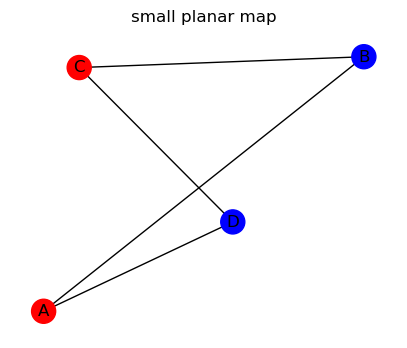

In [69]:
small_planar_map = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85)],
    'edges': [(0, 1), (1, 2), (2, 3), (3, 0)],
    'nodes': ['A', 'B', 'C', 'D']
}
color_list = ["red", "blue", "green"]
result = color_map(small_planar_map, color_list, trace=True)
print("Result:", result)
draw_map("small planar map", small_planar_map, (5,4), result)

In [70]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                    (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
              (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
              'New Haven', 'New London', 'Hartford']
}

color_list = ["red", "blue", "green", "yellow"]

result = color_map(connecticut, color_list, trace=False)
print("Result:", result)

Result: [('Fairfield', 'red'), ('Windham', 'red'), ('Litchfield', 'blue'), ('Middlesex', 'blue'), ('Tolland', 'blue'), ('New Haven', 'green'), ('New London', 'green'), ('Hartford', 'red')]


Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [72]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Initial Domains: {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow']}
Removed red from Litchfield's domain. Remaining: ['blue', 'green', 'yellow']
Removed red from New Haven's domain. Remaining: ['blue', 'green', 'yellow']
Assigning Fairfield -> red
Removed blue from Fairfield's domain. Remaining: ['red', 'green', 'yellow']
Removed blue from New Haven's domain. Remaining: ['green', 'yellow']
Removed blue from Hartford's domain. Remaining: ['red', 'green', 'yellow']
Assigning Litchfield -> blue
Removed green from Fairfield's domain. Remaining: ['red', 'yellow']
Removed green from Litchfield's domain. Remaining: ['blue', 'yellow']
Removed green from Hartford's domain. Remaining: ['red', 'yellow']
Removed green from Middlesex's domai

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [73]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

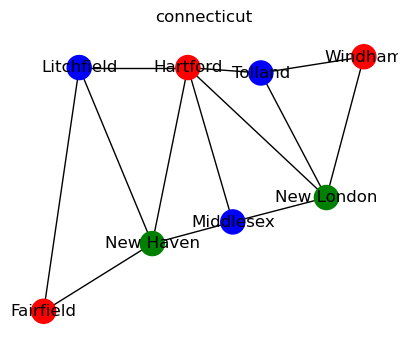

In [74]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

<a id="three_ct"></a>
## Does the Four Color Theorem apply here?

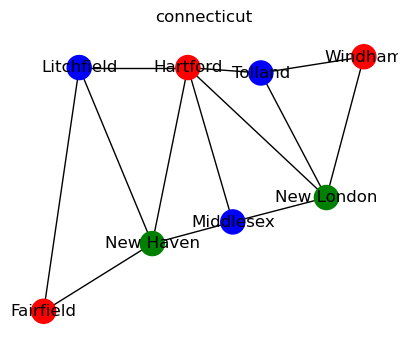

In [80]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [81]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [82]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Initial Domains: {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow'], 8: ['red', 'blue', 'green', 'yellow'], 9: ['red', 'blue', 'green', 'yellow'], 10: ['red', 'blue', 'green', 'yellow'], 11: ['red', 'blue', 'green', 'yellow'], 12: ['red', 'blue', 'green', 'yellow'], 13: ['red', 'blue', 'green', 'yellow'], 14: ['red', 'blue', 'green', 'yellow'], 15: ['red', 'blue', 'green', 'yellow'], 16: ['red', 'blue', 'green', 'yellow'], 17: ['red', 'blue', 'green', 'yellow'], 18: ['red', 'blue', 'green', 'yellow'], 19: ['red', 'blue', 'green', 'yellow'], 20: ['red', 'blue', 'green', 'yellow'], 21: ['red', 'blue', 'green', 'yellow'], 22: ['red', 'blue', 'green', 'yellow'], 23: ['red', 'blue', 'green', 'yellow'], 24: ['red', 'blue', 'green', 'ye

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [83]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

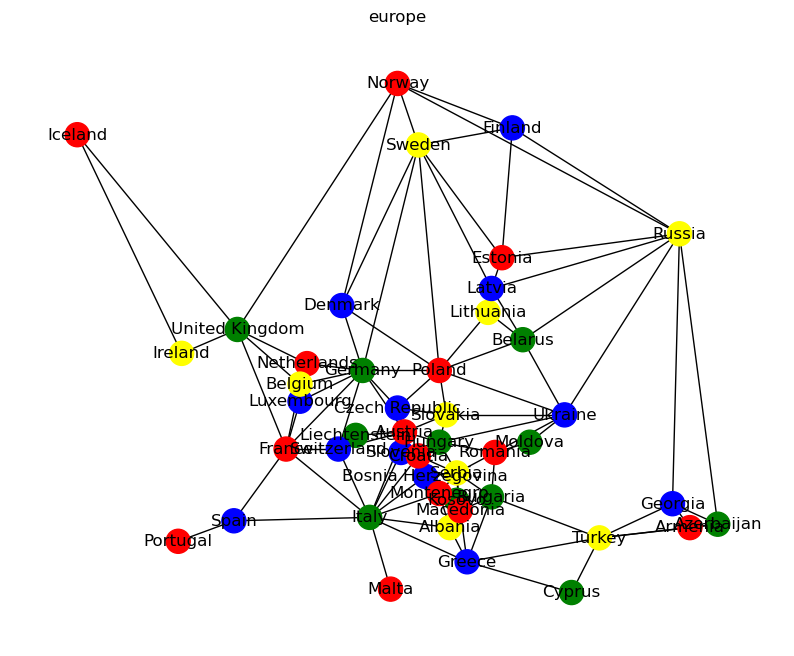

In [84]:
draw_map("europe", europe, (10,8), europe_colors)

<a id="three_eu"></a>
## Does the Four Color Theorem apply here?

In [85]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.